## Getting Support Figures

In this notebook, we'll just post the code used to obtain figures that will be relevant for the MSc Thesis that do not use, in any regard, the educational dataset.

In [1]:
#importar packages para manipulação dos diretórios
import os
import glob

#packages standard para tratamento de dados
import pandas as pd
import numpy as np
import scipy as sc

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#packages geográficos
import requests

sns.set()
%matplotlib inline

#### Uploading Files

In [2]:
#AVISO: NÃO MUDAR LOCALIZAÇÕES DOS SCRIPTS OU FICHEIROS

historico = pd.read_csv('../Data/EDM_LA_nbr of papers.csv', sep = ';')

#### Figure 1: Evolution of Published Works in EDM and LA

In [3]:
# setting up for figure
# x_axis = historico['Year'] 
# LA = historico['Learning Analytics']
# EDM = historico['Educational Data Mining']

# fig = go.Figure()

# fig.add_trace(
#     go.Bar(
#         x= x_axis,
#         y= LA,
#         name='<b>Learning Analytics</b>',
#         marker_color='rgb(92, 102, 108)'
#         )
#     )

# fig.add_trace(
#     go.Bar(
#         x=x_axis,
#         y=EDM,
#         name='<b>Educational Data Mining</b>',
#         marker_color='rgb(191, 215, 47)'
#         )
#     )

# fig.update_layout(
#     font=dict(
#         family="Calibri, serif",
#         color = 'black'),
#     xaxis_tickfont_size=14,
#     xaxis_title = '<b>Year</b>',
#     yaxis=dict(
#         title='<b>Number of Research Papers</b>',
#         titlefont_size=16,
#         tickfont_size=14,
#     ),
#     legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(0, 0, 0, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
#     barmode='group',
#     bargroupgap=0.1 # gap between bars of the same location coordinate.
# )

# fig.show()

# fig.write_image("../Images/figure_1.png", )            
# fig.show()

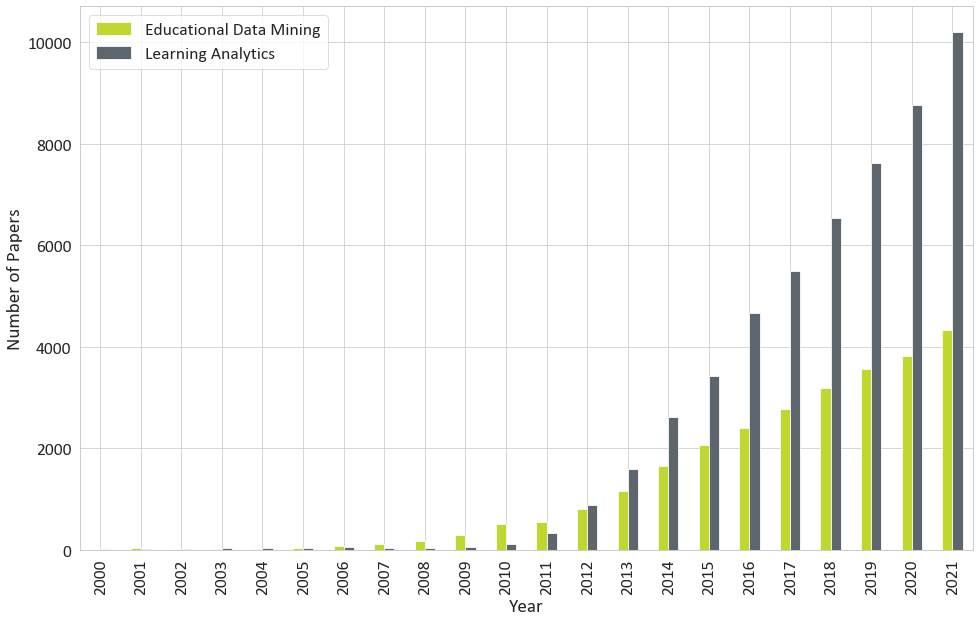

In [4]:
#set seaborn plotting aesthetics
#settub
sns.set_theme(context='paper', style='whitegrid', font='Calibri', rc={"figure.figsize":(16, 10)}, font_scale=2)

ax = historico.plot(kind = 'bar', x = 'Year', color=['#BFD72F', '#5C666C'])

ax.set(ylabel = 'Number of Papers',
      xlabel = 'Year')

# adding text annotations
#plt.text(8, 500, "1st EDM\nConference", horizontalalignment='center', size='medium', color='#BFD72F', weight='bold')
#plt.text(11, 900, "1st LA\nConference", horizontalalignment='center', size='medium', color='#5C666C', weight='bold')
ax.legend(loc='upper left')

plt.savefig("../Images/figure_1.png", transparent = True, dpi=300)

The following cell results from the development of the Deep Learning Model and may come in handy for future analysis of the results.

In [ ]:
diz_ep = {'train_loss_ep':[],'val_loss_ep':[],'train_acc_ep':[],'val_acc_ep':[]}

for i in range(num_epochs):
    diz_ep['train_loss_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['train_loss'][i] for f in range(k)]))
    diz_ep['val_loss_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['val_loss'][i] for f in range(k)]))
    diz_ep['train_acc_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['train_acc'][i] for f in range(k)]))
    diz_ep['val_acc_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['val_acc'][i] for f in range(k)]))

# Plot losses
sns.set_theme(context='paper', style='whitegrid', rc={"figure.figsize":(16, 10)}, font='Calibri', font_scale=2)
plt.semilogy(diz_ep['train_loss_ep'], label='Train')
plt.semilogy(diz_ep['val_loss_ep'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.grid()
plt.legend()
plt.title(f'Average loss\n {k} Folds', fontweight = 'bold')
plt.show()

# Plot accuracies
sns.set_theme(context='paper', style='whitegrid', rc={"figure.figsize":(16, 10)}, font='Calibri', font_scale=2)
plt.figure()
plt.semilogy(diz_ep['train_acc_ep'], label='Train')
plt.semilogy(diz_ep['val_acc_ep'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
#plt.grid()
plt.legend()
plt.title(f'Accuracy on Validation Data\n{k} Folds', fontweight = 'bold')
plt.show()